In [ ]:
# my tutorial

In [56]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pandas datareader
symbol = 'WATT'
df = pdr.DataReader(symbol, data_source='yahoo')

In [12]:
# save to csv file
df.to_csv('/tmp/' + symbol + '.csv')

In [16]:
# read csv file
df = pd.read_csv('/tmp/WATT.csv', index_col=[0], parse_dates=True)

In [17]:
# show data size
df.shape

(1258, 6)

In [18]:
# generate serial number
df['No'] = [df.index.get_loc(idx) for idx in df.index]

In [28]:
# filter rows
df[df.No % 1000 == 999]

,High,Low,Open,Close,Volume,Adj Close,No
Date,,,,,,,
2020-02-03,1.7,1.58,1.61,1.64,437000,1.64,999


In [70]:
# split df into set of rows and sum Volume
size = 20
splits = [df.iloc[i:i+size-1,:].Volume.sum() for i in range(0, df.shape[0], size)]
splits

[12185400,
 15985800,
 7472000,
 12331100,
 16533600,
 5081800,
 15460200,
 30043200,
 10250000,
 11816100,
 12321300,
 18863400,
 12396200,
 7991800,
 5113000,
 8739000,
 5117300,
 4706000,
 5810300,
 22206400,
 9629000,
 8650300,
 7667500,
 158102400,
 61988500,
 31198400,
 18981700,
 23376400,
 10655800,
 11654600,
 7576300,
 11280500,
 9469200,
 7759400,
 9753500,
 8775700,
 70655900,
 14813100,
 31224800,
 14248900,
 9325100,
 7973900,
 5481600,
 7925400,
 4844900,
 4344200,
 5970300,
 9288900,
 15364800,
 15540200,
 11895600,
 13100300,
 159172200,
 28942300,
 70409200,
 46069100,
 31688300,
 19804900,
 19250900,
 12547500,
 69065700,
 156425600,
 100997765]

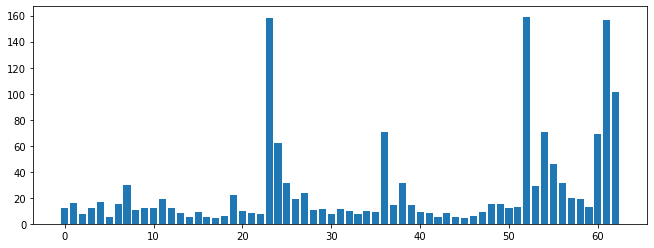

In [67]:
# bar chart
plt.figure(figsize=[11, 4])
plt.bar(range(0, len(splits)), height = np.array(splits)/1000000, label='Men')
plt.show()